# Exploratory Data Analysis

Classical statistics is focused on **inference**, a set of procedures for getting conclusions about large populations based one small samples. **Data analysis** includes statistical inference as just one component.

## Content
- **Estimates of Location**
    - Compute the mean, trimmed mean, the median of the state population
    - Compute the average murder rate for the country
- **Estimates of Variability**
    - Computing standard deviation, quantiles, and MAD of state population
- **Exploring Data Distribution**
    - Compute some percentiles of the murder rate by state.
    - Plotting boxplot of the population by state
    - Compute frequency table for population by state 
    - Plotting a histogram
    - Plotting density plot superposed on a histogram
- **Exploring Binary and Categorical Data**
    - Plotting bar charts of airport delays per year by cause
    - Mode and Expected Value
    - Probability
- **Correlation**
    - Compute correlation between telecommunication stock returns from July 2021 through June 2015
    - Compute heatmap of daily returns for major exchange-traded funds (ETFs).
    - Plotting scatterplot of correlation between returns for ATT and Verizon
- **Exploring Two or More Variables**
    - Plotting hexagonal binning of relationship between the finished square feet and tax-assessed value for homes in King County
    - Plotting contour plot for tax-assessed value vs. finished square feet
    - Compute contingency table between a grade of a personal loan and outcome of that loan
    - Plotting boxplot of percent of airline delays by carrier
    - Plotting Violin plot of percent of airline delays by carrier
    - Plotting facets (hexagonal bins of tax-assessed value vs. finished square feet conditioning on zip code)


In 1962, John W. Tukey (Figure 1-1) called for a reformation of statistics in his
seminal paper “The Future of Data Analysis”. The field of exploratory data analysis was established with Tukey’s 1977 now-classic book *Exploratory Data Analysis*. Tukey presented simple plots (e.g., boxplots, scatterplots) that, along with summary statistics (mean, median, quantiles, etc.), help paint a picture of a data set.

## Elements of Structured Data

Data comes from many sources: sensor measurements, events, text, images, and videos. The Internet of Things (IoT) is spewing out streams of information. Much of this data is unstructured: images are a collection of pixels, with each pixel containing RGB
(red, green, blue) color information. Texts are sequences of words and nonword characters, often organized by sections, subsections, and so on. Clickstreams are sequences of actions by a user interacting with an app or a web page. In fact, a major
challenge of data science is to harness this torrent of raw data into actionable information. To apply the statistical concepts covered in this book, unstructured raw data must be processed and manipulated into a structured form. One of the commonest
forms of structured data is a table with rows and columns—as data might emerge
from a relational database or be collected for a study.

Important key terms:
- **Numeric**
    - **Continuous**
    - **Discrete**
- **Categorical**
    - **Binary**
    -**Ordinal**

## Estimates of Location

Important key term
- **Mean**
- **Weighted mean** (eg. less accurate sensors get a lower weight)
- **Median**
- **Percentile**
- **Weighted median** (ie. value at index such that the sum of the weights is equal for the lower and upper halves of the sorted list)
- **Trimmed mean** (eg. diving competitions top and bottom removed then averaged)
- **Robust**
- **Outlier**

A basic step in exploring data is getting a 'typical value' for each feature (variable): an estimate of where most of the data is located (i.e. its central tendency). Metrics and Estimates Note: statisticians estimate and data scientist measure.

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels import robust

In [2]:
DATA = 'data/'

DFW_AIRPORT_DELAYS_CSV = DATA + 'dfw_airline.csv'
STATE_CSV = DATA + 'state.csv'
SP500_SECTORS = DATA + 'sp500_sectors.csv'
SP500 = DATA + 'sp500_data.csv.gz'
KC_TAX = DATA + 'kc_tax.csv.gz'
LC_LOANS = DATA + 'lc_loans.csv'
AIRLINE_STATS = DATA + 'airline_stats.csv'

In [3]:
df = pd.read_csv(STATE_CSV)
df.sample(5)

,State,Population,Murder.Rate,Abbreviation
5,Colorado,5029196,2.8,CO
9,Georgia,9687653,5.7,GA
29,New Jersey,8791894,3.9,NJ
3,Arkansas,2915918,5.6,AR
46,Washington,6724540,2.5,WA


### Compute the mean, trimmed mean, the median of the state 
Ideas: mean is sensitive to extreme values (outliers) and median and trimmed are less sensitive to outliers and unusual distributions and hence are more robust.

In [4]:
print('population mean {}'.format(df['Population'].mean()))
print('population median {}'.format(df['Population'].median()))
# 10% is a common choice for trimmed mean
print('population trimmed mean {}'.format(trim_mean(df['Population'], .1)))

population mean 6162876.3
population median 4436369.5
population trimmed mean 4783697.125


**Notes:**

The trimmed mean can be thought of as a compromise between the median and the mean: it is robust to extreme values in the data, but uses more data to calculate the estimate for location.

Also, above we have mean > trimmed mean > median

### Compute the average murder rate for the country
Note: we need to use a weighted mean to account for different populations in the states. Weighted average of $(x_i)_{i=1}^n$ with weights $(w_i)_{i=1}^n$ is calculated by
$$
w_{avg} = \frac{\sum_{i=1}^n x_iw_i}{\sum_{i=1}^n w_i}
$$

In [11]:
df['mtimesp'] = df['Murder.Rate']*df['Population']
print('weighted mean', df['mtimesp'].mean()/df['Population'].mean())

weighted mean 4.445833981123393


In [12]:
print('weighted mean {}'.format(np.average(df['Murder.Rate'], weights=df['Population'])))

weighted mean 4.445833981123393


### Compute the median murder rate for the country

In [10]:
df.sort_values('Murder.Rate', inplace=True)
cumsum = df.Population.cumsum()
cutoff = df.Population.sum() / 2.0
median = df['Murder.Rate'][cumsum >= cutoff].iloc[0]
print('weighted median: ', median)
print('median: ', df['Murder.Rate'].median())

weighted median:  4.4
median:  4.0


**Further Reading**:
The Wikipedia article on [central tendency](https://oreil.ly/qUW2i) contains an extensive discussion of
various measures of location.

## Estimates of Variability

Important key terms:
- **Deviations**
- **Variance** (sample, n-1 causes variance to become an unbiased estimate)
- **Standard deviation**
- **Mean absolute deviation**
- **Median absolute deviation from the median**
- **Range**
- **Order statistics**
- **Percentile** (value s.t. P% of values take on values less and (100-P)% take on values more)
- **Interquartile range**

Variability refers to dispersion, whether the data values are tightly clustered or spread out. At the heart of statisitcs lies variability: measuring it, reducing it, distinguishing random from real, identifying the sources of real variability, and making decisions in the presence of it.

### Estimates Based on Percentiles

Statistics based on sorted(ranked) data are referred to as **order statistics**. The most basic is range: largest value in data minus smallest value in data. Range is extremely sensitive to outliers and not very useful as a general measure of dispersion in the data. There are techniques that account for outliers. 

### Percentile:
The Pth percentile is a value such that at least P percent of the values take on this value or less and at least (100-P) percent of the values take on this value of more. A common measurement of variability is the difference between the 25th percentile and the 75th percentile, called the **interquartile range** (IQR).

#### Percentile: Precise Definition
If we have an even number of data (n is even), then the percentile is ambiguous under the preceding definition. In fact, we could take on any value between the order statistics $x_{(j)}$ and $x_{(j+1)}$ where j satisfies:

$$
100*\frac{j}{n} \leq P < 100*\frac{j+1}{n} 
$$

Formally, the percentile is the weighted average:

$$
\text{Percentile}(P) = (1-w)x_{(j)}+wx_{(j+1)}
$$

for some weight w between 0 and 1. Statistical software has slightly
differing approaches to choosing w. Except for small data sets, you don’t usually need to worry about the precise way a percentile is calculated. At the time of this writing, Python’s numpy.quantile supports only one approach, linear interpolation.

In [12]:
#Explicit example
data_example = [4, 2, 5, 4, 5, 6, 4, 4, 4, 5, 8, 4, 12, 5, 20, 5, 4, 8, 4, 3]
percentile_choice = 0.75
distance_example = len(data_example) - 1
virtual_index = percentile_choice * distance_example

sorted_data_example = sorted(data_example)
print(sorted_data_example)

idx_example = int(virtual_index) #Value a can be found at this index: int(14.25) = 14
jdx_example = idx_example + 1 #Value b can be found at this index: 14 + 1 = 15
frac_example = virtual_index - idx_example #14.25 - 14 = 0.25
a_example = sorted_data_example[idx_example] #sorted_data[14] = 5
b_example = sorted_data_example[jdx_example] #sorted_data[15] = 6
percentile_example = a_example + (b_example-a_example) * frac_example #5 + (6-5) * 0.25 = 5.25
print(f"Value at index {idx_example} is: {a_example}")
print(f"Value at index {jdx_example} is: {b_example}")
print(f"The value of frac is: {frac_example}")
print(f"The found percentile is {percentile_example}")

[2, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 8, 8, 12, 20]
Value at index 14 is: 5
Value at index 15 is: 6
The value of frac is: 0.25
The found percentile is 5.25


### Computing standard deviation, quantiles, and MAD of State Population

In [11]:
print('Population standard deviation ',df['Population'].std())
print('Population IQR ',df['Population'].quantile(.75) - df['Population'].quantile(.25))
print('Population MAD ',robust.scale.mad(df['Population']))
# this value is used for a consistent estimator for the estimation of std. 
# and 50% of the normal distribution fall within the range plus minus MAD
consistent_est_normal_val = 0.6744897501960817
print('Population robust MAD ',(abs(df['Population'] - df['Population'].median()).median() / consistent_est_normal_val))


Population standard deviation  6848235.347401144
Population IQR  4847308.0
Population robust MAD  3849876.1459979336
Population robust MAD  3849876.1459979336


Note std is almost twice as large as MAD. Not surprising since std is sensitive to outliers

## Exploring Data Distribution

Sometime we need to see how the data is distributed rather than the location and variability. Some key terms for exploring data distributions are: 

- **Boxplot** 
- **Frequency table**
- **Histogram**
- **Density plot**

### **Percentiles and Boxplots**
Percentiles are especially valuable for summarizing the tails of the distributions.

### Compute some percentiles of the murder rate by state.

In [14]:
df['Murder.Rate'].quantile([.05, .25, .5, .75, .95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

Note: The median is 4 murders per 100,000 people, but there's some variability: 5th percentile is 1.6 and the 95th percentile is 6.51

### Plotting boxplot of the population by state

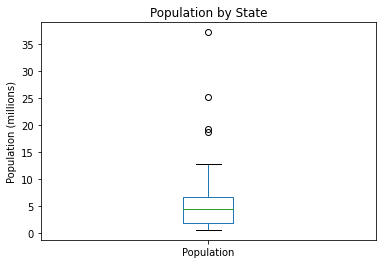

In [15]:
ax = (df['Population']/1000000).plot.box(title='Population by State')
ax.set_ylabel('Population (millions)')
plt.show()

From this boxplot we can immediately see that the median state population is about 5 million, half the states fall between 2 million and about 7 million, and there are some high population outliers.

Note that the horizontal line after and before the whiskers are the minimum (Q1-1.5*IQR) and maximum(Q3+1.5*IQR) and the circles are outliers.

### **Frequency Table and Histograms**

### Compute frequency table for population by state

In [16]:
binnedPopulation = pd.cut(df['Population'], 10)
binnedPopulation.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(33584923.0, 37253956.0]     1
(22577824.0, 26246857.0]     1
(18908791.0, 22577824.0]     1
(15239758.0, 18908791.0]     1
(29915890.0, 33584923.0]     0
(26246857.0, 29915890.0]     0
Name: Population, dtype: int64

In [12]:
binnedPopulation.name = 'binnedPopulation'
dfbinned = pd.concat([df, binnedPopulation], axis=1)
dfbinned = dfbinned.sort_values(by='Population')

groups = []
for group, subset in dfbinned.groupby(by='binnedPopulation'):
    groups.append({
        'BinRange': group,
        'Count': len(subset),
        'States': ','.join(subset.Abbreviation)
    })
pd.DataFrame(groups)

,BinRange,Count,States
0,"(526935.67, 4232659.0]",24,"WY,VT,ND,AK,SD,DE,MT,RI,NH,ME,HI,ID,NE,WV,NM,N..."
1,"(4232659.0, 7901692.0]",14,"KY,LA,SC,AL,CO,MN,WI,MD,MO,TN,AZ,IN,MA,WA"
2,"(7901692.0, 11570725.0]",6,"VA,NJ,NC,GA,MI,OH"
3,"(11570725.0, 15239758.0]",2,"PA,IL"
4,"(15239758.0, 18908791.0]",1,FL
5,"(18908791.0, 22577824.0]",1,NY
6,"(22577824.0, 26246857.0]",1,TX
7,"(26246857.0, 29915890.0]",0,
8,"(29915890.0, 33584923.0]",0,
9,"(33584923.0, 37253956.0]",1,CA


Note: It's important to include empty bins, which is useful information.

### Plotting a Histogram

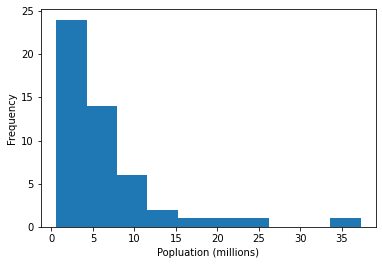

In [13]:
ax = (df['Population']/1000000).plot.hist()
ax.set_xlabel('Popluation (millions)')
plt.show()

Note: First and second moment are seen as location and variability, respectively. The third and fourth moments are called **skewness**(whether the data is skewed to larger or smaller values) and **kurtosis**(the propensity of the data to have extreme values). Boxplots help with discovering kurtosis and histograms help with discovering skewness.

## Density Plots and Estimates: 
Density plots are useful for showing the shape of a distribution and identifying its mode, skewness, and kurtosis.

### Plotting density plot superposed on a histogram

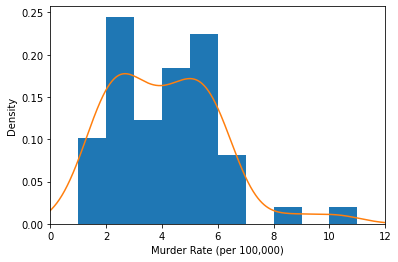

In [14]:
ax = df['Murder.Rate'].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
df['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')
plt.show()

## Exploring Binary and Categorical Data

For categorical data, simple proportions or percentages tell the story of the data

Key terms: 
- **Mode**
- **Expected Value** 
- **Bar chart** 
- **Pie charts**(usually seen as less visually informative by statisticians and data visualization experts)

In [15]:
dfw = pd.read_csv(DFW_AIRPORT_DELAYS_CSV)
dfw.head()

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


Getting a summary of binary variable or categorical variables with a few categories is just figuring out the proportion of 1s, or the proportions of the important categories.

In [16]:
dfw = pd.read_csv(DFW_AIRPORT_DELAYS_CSV)
100 * dfw / dfw.values.sum()

,Carrier,ATC,Weather,Security,Inbound
0,23.022989,30.400781,4.025214,0.122937,42.428079


### Plotting bar charts of airport delays per year by cause

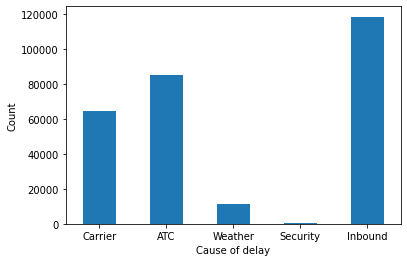

In [17]:
ax = dfw.transpose().plot.bar(legend=False, rot=0)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')
plt.show()

Note: this bar chart resembles a histogram; in a bar chart the x-axis represents different categories of a factor, while in a histogram the x-axis represents values of a single variable on a numeric scale.

### Mode and Expected Value

Above we see that the mode for cause of airline delays is 'Inbound'. 

Expected value is a form of weighted mean, in which the weights are probabilities. To calculate:
1. Multiply each outcome by its probability of occurrence.
2. Sum these values.

Example:
A marketer for a new cloud technology offers two levels of service, one priced at 300 dollars per month and another at 50 dollars per month. The marketer offers a free webinar to generate leads, and the firm figures that 5\% of the attendees will sign up for the 300 dollar service, 15\% will sign up for the 50 dollar service. The expected value of a webinar attendee is:
$$
EV = (.05)*300 + (.15)*50 = 22.5 \text{ dollars per month}
$$

### Probability
Probability that an event will happen is the proportion of times it will occur if the situation could be repeated over and over, countless times.

## Correlation

Given variables X and Y (each with measured data), to compute Pearson's correlation coefficient:
$$
r = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{(n-1)s_x s_y}
$$

where $s_x$ and $s_y$ are standard deviations of X and Y. Note that $-1 \leq r\leq 1$ where $-1$ is perfectly negative correlation, $1$ is perfectly positive correlation, and $0$ indicates no correlation.

### Compute correlation between telecommunication stock returns from July 2021 through June 2015

In [18]:
sp500 = pd.read_csv(SP500, index_col = 0)
sp500.head()

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,-0.007105,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,0.063893,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,-0.014192,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,-0.007105,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,-0.007096,...,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


In [19]:
sp500_sector = pd.read_csv(SP500_SECTORS)
sp500_sector.head()

,sector,sector_label,sub_sector,symbol
0,information_technology,Technology,data_processing_&_outsourced_services,ADS
1,information_technology,Technology,systems_software,CA
2,information_technology,Technology,systems_software,MSFT
3,information_technology,Technology,systems_software,RHT
4,information_technology,Technology,it_consulting_&_services,CTSH


In [20]:
sp500_sector['sector'].unique()

array(['information_technology', 'industrials', 'energy',
       'consumer_discretionary', 'utilities', 'materials', 'etf',
       'telecommunications_services', 'consumer_staples', 'financials',
       'health_care'], dtype=object)

In [21]:
telecom_sym = sp500_sector[sp500_sector['sector'] == 'telecommunications_services']['symbol']
telecom = sp500.loc[sp500.index >= '2012-07-01', telecom_sym]
telecom.head()

,T,CTL,FTR,VZ,LVLT
2012-07-02,0.422496,0.140847,0.070879,0.554180,-0.519998
2012-07-03,-0.177448,0.066280,0.070879,-0.025976,-0.049999
2012-07-05,-0.160548,-0.132563,0.055128,-0.051956,-0.180000
2012-07-06,0.342205,0.132563,0.007875,0.140106,-0.359999
2012-07-09,0.136883,0.124279,-0.023626,0.253943,0.180000


In [22]:
telecom.corr()

,T,CTL,FTR,VZ,LVLT
T,1.000000,0.474683,0.327767,0.677612,0.278626
CTL,0.474683,1.000000,0.419757,0.416604,0.286665
FTR,0.327767,0.419757,1.000000,0.287386,0.260068
VZ,0.677612,0.416604,0.287386,1.000000,0.242199
LVLT,0.278626,0.286665,0.260068,0.242199,1.000000


Note: We can see that Verizon(VZ) and ATT(T) have the highest correlation. Level 3 (LVLT), has the lowest correlation with others.

### Compute heatmap of daily returns for major exchange-traded funds (ETFs).

<AxesSubplot:>

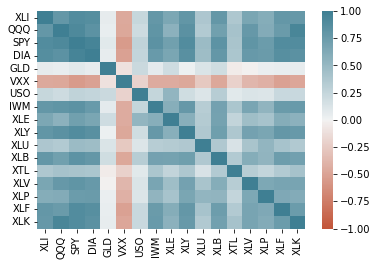

In [23]:
etfs_sym = sp500_sector[sp500_sector['sector'] == 'etf']['symbol']
etfs = sp500.loc[sp500.index > '2012-07-01', etfs_sym]
sns.heatmap(etfs.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True))

Note: ETFs for the S&P 500 (SPY) and the Dow Jones Index (DIA) have a high correlation. Similarly, the QQQ and the XLK, composed mostly of technology companies are positively correlated. Defensive ETFs, such as thosee tracking gold prices (GLD), oil prices (USO), or market volatility (VXX), tend to be weakly or negatively correlated with the other ETFs.

Also the correlation coefficient is sensitive to outliers in the data.

## Scatterplots

### Plotting scatterplot of correlation between returns for ATT and Verizon

The standard way to visualize the relationship between two measured data variables is with a scatterplot.

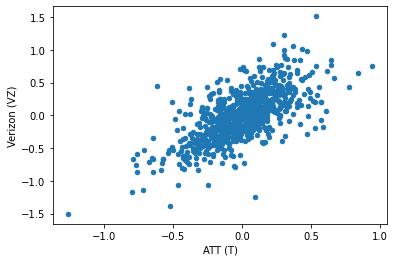

In [24]:
ax = telecom.plot.scatter(x='T', y='VZ')
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
plt.show()

Note: The returns have a positive relationship: while they cluster around zero, on most days, the stock go up or go down in tandem.

# Exploring Two or More Variables

## Hexagonal Binning and Contours (Plotting Numeric Versus Numeric Data)

For data sets with hundreds of thousdands or millions of records, a scatterplot will be too dense. Consider the following example:

In [25]:
kc = pd.read_csv(KC_TAX)
kc.head()

,TaxAssessedValue,SqFtTotLiving,ZipCode
0,NaN,1730,98117.0
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0


Focus on the main part of the data, stip out very expensive and very small or large residences.

In [26]:
kc0 = kc.loc[(kc.TaxAssessedValue < 750000) &
              (kc.SqFtTotLiving > 100) &
              (kc.SqFtTotLiving < 3500), :]
kc0.shape

(432693, 3)

### Plotting hexagonal binning of relationship between the finished square feet and tax-assessed value for homes in King County

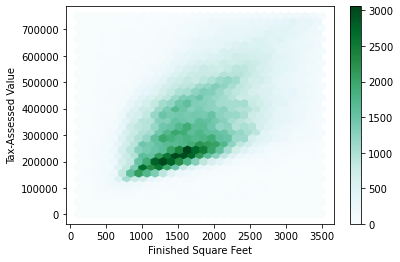

In [27]:
ax = kc0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue', gridsize=30, sharex=False)
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax-Assessed Value')
plt.show()

This is a hexagonal binning plot with a clear positive relationship between square feet and tax-assessed value.

### Plotting contour plot for tax-assessed value vs. finished square feet

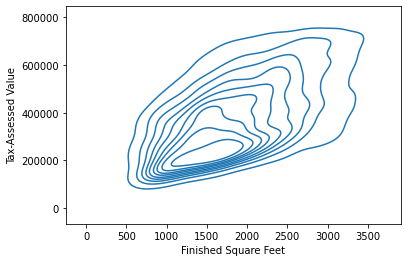

In [30]:
ax = sns.kdeplot(data=kc0.sample(n=10000, random_state=1), x='SqFtTotLiving', y='TaxAssessedValue')
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax-Assessed Value')
plt.show()

## Two Categorical Variables

### Compute contingency table between a grade of a personal loan and outcome of that loan

In [34]:
lc_loans = pd.read_csv(LC_LOANS)
lc_loans.head()

,status,grade
0,Fully Paid,B
1,Charged Off,C
2,Fully Paid,C
3,Fully Paid,C
4,Current,B


In [40]:
crosstab = lc_loans.pivot_table(index='grade', columns='status', aggfunc=lambda x: len(x), margins=True)
crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241
All,22671,321185,97316,9789,450961


In [38]:
df = crosstab.loc['A': 'G', :].copy()
df.loc[:, 'Charged Off':'Late'] = df.loc[:, 'Charged Off':'Late'].div(df['All'], axis=0)
df['All'] = df['All']/sum(df['All'])
perc_crosstab = df
perc_crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,0.160746
B,0.040054,0.709013,0.235401,0.015532,0.293529
C,0.049828,0.735702,0.191495,0.022974,0.268039
D,0.067410,0.717328,0.184189,0.031073,0.164708
E,0.081657,0.707936,0.170929,0.039478,0.077177
F,0.118258,0.654371,0.180409,0.046962,0.028614
G,0.126196,0.614008,0.198396,0.061401,0.007187


Note: This table shows the count and row percentages. High-grade loans have a very low late/charge-off percentage as compared with lower-grade loans

## Categorical and Numeric Data

### Plotting boxplot of percent of airline delays by carrier

In [42]:
airline_stats = pd.read_csv(AIRLINE_STATS)
airline_stats.head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


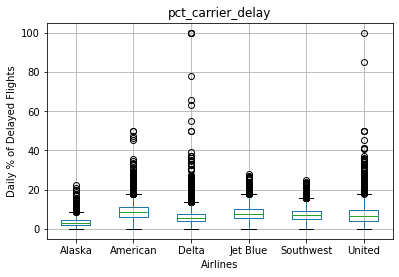

In [55]:
ax = airline_stats.boxplot(by='airline', column='pct_carrier_delay')
ax.set_xlabel('Airlines')
ax.set_ylabel('Daily % of Delayed Flights')
plt.suptitle('')
plt.show()

Note: Alaska stands out as having the fewest delays, while American has the most delays: the lower quartile for American is higher than the upper quartile for Alaska.

### Plotting Violin plot of percent of airline delays by carrier

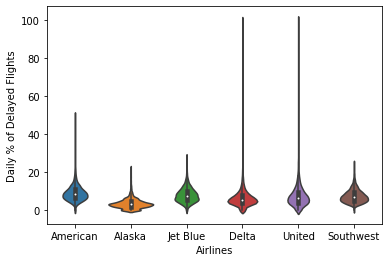

In [56]:
ax = sns.violinplot(data=airline_stats, x='airline', y='pct_carrier_delay')
ax.set_xlabel('Airlines')
ax.set_ylabel('Daily % of Delayed Flights')
plt.show()

Note: The violin plot shows a concentraion in the distribution near zero for Alaska and, to a lesser extent, Delta.

## Visualizing Multiple Variables

In [59]:
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc0.loc[kc0.ZipCode.isin(zip_codes), :]
kc_tax_zip.head()

,TaxAssessedValue,SqFtTotLiving,ZipCode
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
10,202000.0,830,98108.0
11,210000.0,1130,98108.0
12,193000.0,1560,98108.0


### Plotting facets (hexagonal bins of tax-assessed value vs. finished square feet conditioning on zip code)

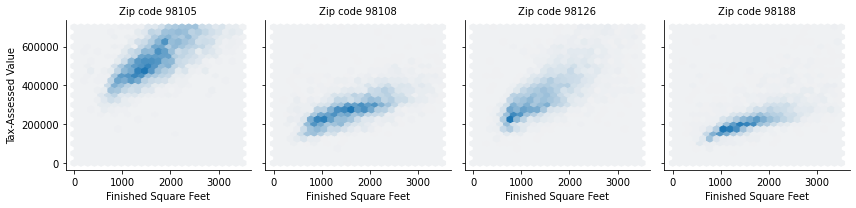

In [68]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x=x, y=y, gridsize=25, cmap=cmap, **kwargs)

g = sns.FacetGrid(kc_tax_zip, col='ZipCode')
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue', extent=[0, 3500, 0, 700000])
g.set_axis_labels('Finished Square Feet', 'Tax-Assessed Value')
g.set_titles(('Zip code {col_name:.0f}'))

Note: Tax-assessed value is much higher in some zip codes (98105, 98126) than in others (98108, 98188).